<a href="https://colab.research.google.com/github/PravalikaMuthoju/Object-detection-with-with-Audio/blob/main/object_detection_and_audio_feedback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:

!pip install -q ultralytics gtts IPython

# Import required libraries
import torch
import cv2
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
from ultralytics import YOLO
from gtts import gTTS
import IPython.display as ipd



In [10]:
# Step 1: Upload Image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Step 2: Load the YOLOv8 Model
model = YOLO('yolov8n.pt')  # Using YOLOv8 nano model (lightweight)

# Step 3: Perform Object Detection
results = model(image_path)

# Step 4: Load and prepare the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 5: Draw Bounding Boxes and Labels
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
        class_id = int(box.cls[0])              # Class ID
        label = model.names[class_id]           # Object label

        # Draw Bounding Box and Label
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 3)
        cv2.putText(image, label, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)


Saving Cute_dog.jpg to Cute_dog.jpg

image 1/1 /content/Cute_dog.jpg: 448x640 1 dog, 170.4ms
Speed: 5.0ms preprocess, 170.4ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


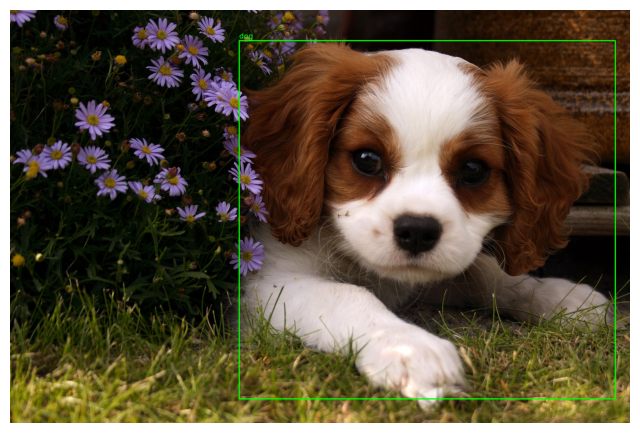

Detected objects are: dog


In [11]:

# Step 6: Display Image with Detected Objects
plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.axis("off")
plt.show()

# Step 7: Convert Detected Object Names to Speech
detected_objects = list(set(
    model.names[int(box.cls[0])]
    for result in results
    for box in result.boxes
))

if detected_objects:
    text_to_speak = "Detected objects are: " + ", ".join(detected_objects)
    print(text_to_speak)

    # Convert text to speech
    tts = gTTS(text_to_speak, lang="en")
    tts.save("output.mp3")

    # Play the generated audio
    ipd.display(ipd.Audio("output.mp3", autoplay=True))
else:
    print("No objects detected.")
